In [1]:
# sklearn analytics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression



# General
import warnings
import numpy as np
import pandas as pd
import random
import os
import re
import string
import statsmodels.api as sm
from os import path
from PIL import Image
from time import time
from sklearn import utils


/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Read and Peak at Data
df = pd.read_csv(
    'https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/customers_data.csv')

df.head()

,Unnamed: 0,purch_amt,gender,card_on_file,age,days_since_last_purch,loyalty
0,0,19.58,male,no,31.0,35.0,False
1,1,65.16,male,yes,23.0,61.0,False
2,2,40.60,female,no,36.0,49.0,False
3,3,38.01,male,yes,47.0,57.0,False
4,4,22.32,female,yes,5.0,39.0,False


In [3]:
def binary_gender(gender):
    if gender == 'female':
        return 0
    else:
        return 1

def binary_card(card_on_file):
    if card_on_file == 'no':
        return 0
    else:
        return 1
      
def binary_loyalty(loyalty):
    if loyalty == False:
        return 0
    else:
        return 1      
#df = df.replace(0, np.nan)
df = df.dropna()

df['gender_recode'] = df['gender'].apply(binary_gender)
df['card_recode'] = df['card_on_file'].apply(binary_card)
df['loyalty_recode'] = df['loyalty'].apply(binary_loyalty)

df = df.drop(['Unnamed: 0', 'gender', 'card_on_file', 'loyalty' ], 
             axis='columns')
df.head()

,purch_amt,age,days_since_last_purch,gender_recode,card_recode,loyalty_recode
0,19.58,31.0,35.0,1,0,0
1,65.16,23.0,61.0,1,1,0
2,40.60,36.0,49.0,0,0,0
3,38.01,47.0,57.0,1,1,0
4,22.32,5.0,39.0,0,1,0


In [4]:
df.describe()

,purch_amt,age,days_since_last_purch,gender_recode,card_recode,loyalty_recode
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,44.036234,25.803008,56.605908,0.501508,0.500725,0.166667
std,20.473148,10.153072,16.422187,0.500000,0.500002,0.372680
min,-43.950000,-22.000000,-9.000000,0.000000,0.000000,0.000000
25%,30.210000,19.000000,45.000000,0.000000,0.000000,0.000000
50%,43.970000,26.000000,57.000000,1.000000,1.000000,0.000000
75%,57.830000,33.000000,68.000000,1.000000,1.000000,0.000000
max,142.200000,71.000000,125.000000,1.000000,1.000000,1.000000


In [5]:
df = df[df['purch_amt'] > 0]
df = df[df['age'] > 13]
df = df[df['days_since_last_purch'] > 0]
df.describe()

,purch_amt,age,days_since_last_purch,gender_recode,card_recode,loyalty_recode
count,104861.000000,104861.000000,104861.000000,104861.000000,104861.000000,104861.000000
mean,44.968775,27.990244,56.330743,0.502541,0.499728,0.179876
std,19.628377,8.464575,16.475841,0.499996,0.500002,0.384086
min,0.010000,14.000000,1.000000,0.000000,0.000000,0.000000
25%,31.090000,21.000000,45.000000,0.000000,0.000000,0.000000
50%,44.530000,27.000000,57.000000,1.000000,0.000000,0.000000
75%,58.230000,34.000000,68.000000,1.000000,1.000000,0.000000
max,142.200000,71.000000,125.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['purch_amt', 'age', 'days_since_last_purch', 'gender_recode',
       'card_recode', 'loyalty_recode'],
      dtype='object')

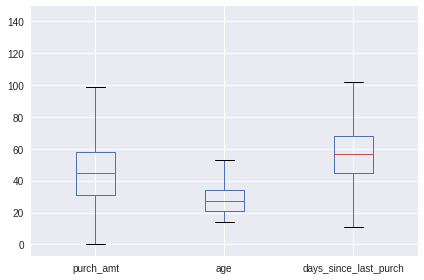

In [7]:
boxplot = df.boxplot(column=['purch_amt', 'age', 'days_since_last_purch'], 
                     showfliers=True)
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


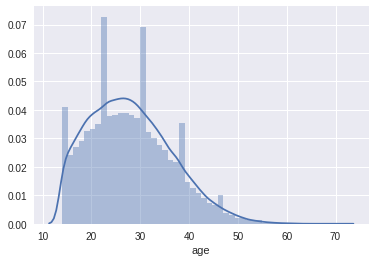

In [8]:
sns.distplot(df.age)
plt.show()

                       purch_amt       age  days_since_last_purch  \
purch_amt               1.000000  0.036773              -0.102006   
age                     0.036773  1.000000              -0.080134   
days_since_last_purch  -0.102006 -0.080134               1.000000   
gender_recode          -0.000581  0.006607               0.000869   
card_recode             0.000548  0.001215               0.002054   
loyalty_recode          0.219063  0.168770              -0.468407   

                       gender_recode  card_recode  loyalty_recode  
purch_amt                  -0.000581     0.000548        0.219063  
age                         0.006607     0.001215        0.168770  
days_since_last_purch       0.000869     0.002054       -0.468407  
gender_recode               1.000000    -0.003173        0.002287  
card_recode                -0.003173     1.000000        0.000155  
loyalty_recode              0.002287     0.000155        1.000000  


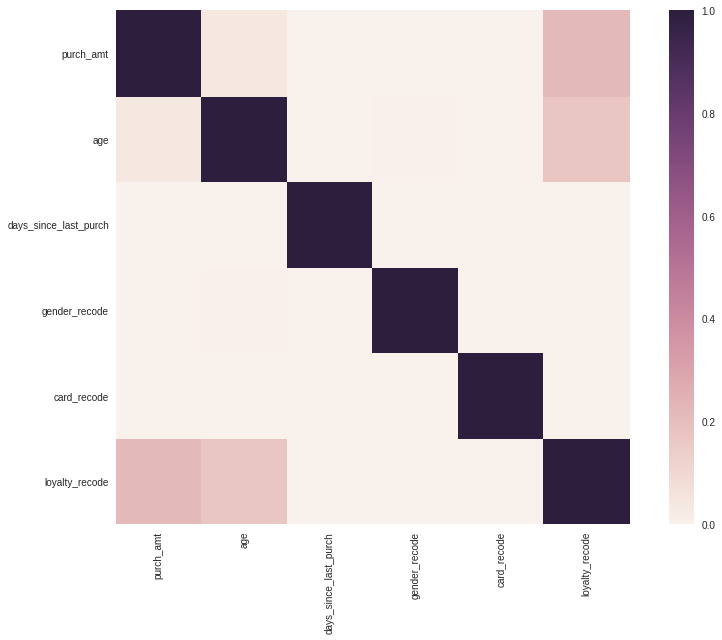

In [9]:
# Making correlation matrix.
corrmat = df.corr()
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=1, vmin=0, square=True)
plt.tight_layout()
#plt.savefig('CorrMat both Sexs.png', dpi=300)
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


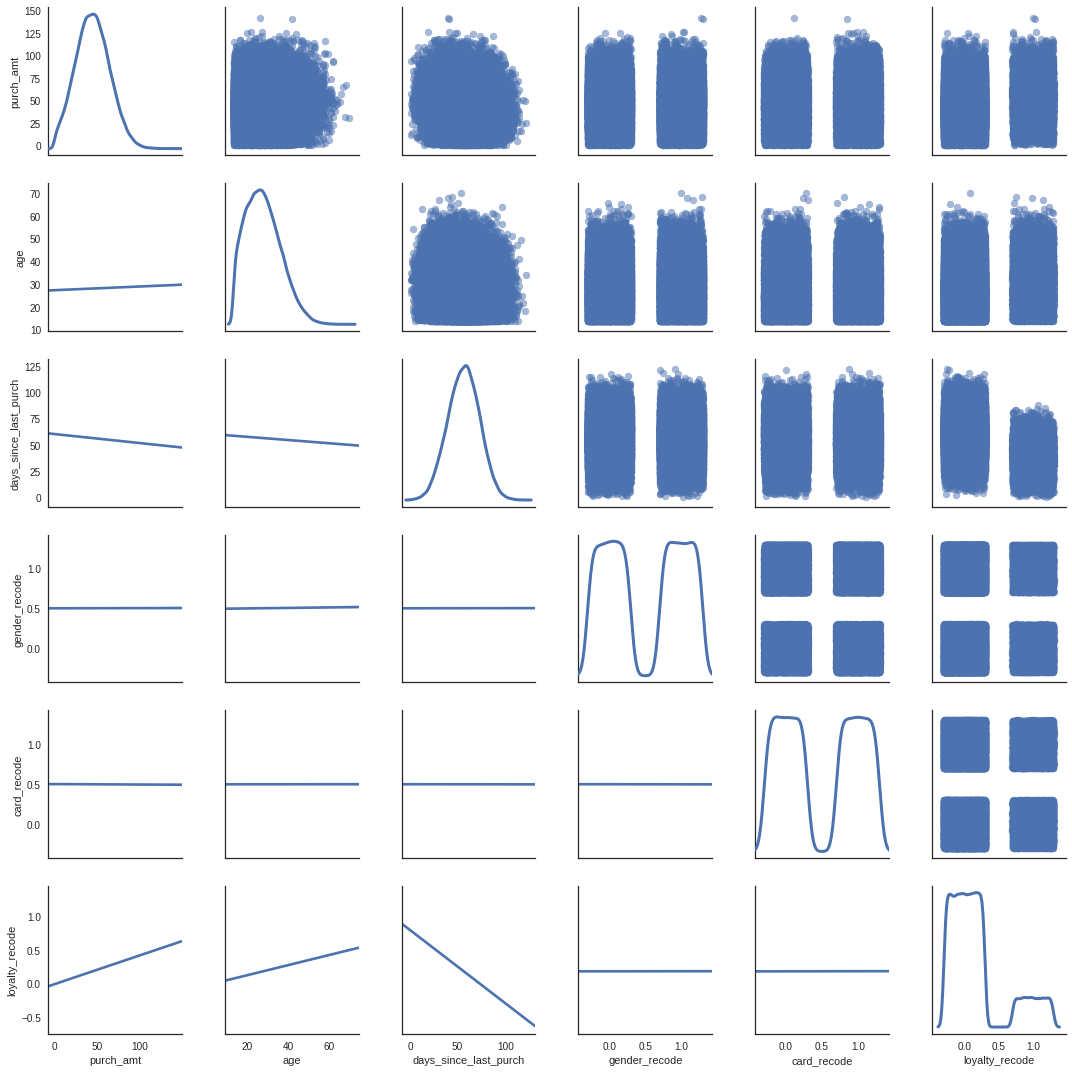

In [10]:
# Make the scatterplot matrix

# Set the default plot aesthetics to be prettier.
sns.set_style("white")

# Make a copy of the data to add jitter to and plot.
df_jittered = df.loc[:,  'purch_amt':'loyalty_recode'].dropna()

# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)

# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)

# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.tight_layout()
#plt.savefig('Scatterplt both Sexs.png', dpi=200)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  import sys


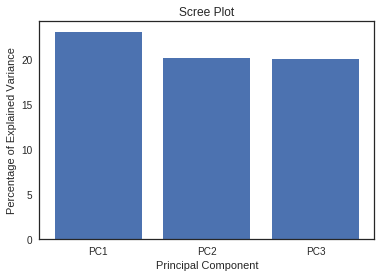

In [11]:
# PCA from many features to 10 PCs
from sklearn.decomposition import PCA
from sklearn import preprocessing

X = df.loc[:, (df.columns != 'loyalty_recode')]

X_scaled = pd.DataFrame(preprocessing.scale(
    X), index=X.index, columns=X.columns)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

pca = PCA(n_components=3)
pc = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data=pc)

# The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.savefig('Scree_Plot_2SEX.png', dpi=300)
plt.show()


#plt.savefig('PCA Scatter 2SEX.png', dpi=300)
plt.show()

In [0]:
# Defining X and y
X_pc = pc[:, 0:3]
y = df['loyalty_recode']

# Creating my training data
X_train, X_test, y_train, y_test = train_test_split(
    X_pc, y, test_size=0.2, random_state=42)

In [0]:
# Defining a function to fit and predict ML algorithms
def auto_model(mod, model_name, X_train, X_test, y_train, y_test):
    t0 = time()
    mod.fit(X_train, y_train)
    print(model_name)
    print("done in %0.3fs" % (time() - t0))
    acc = cross_val_score(mod, X_train, y_train,
                          scoring="accuracy", cv=5)
    predictions = cross_val_predict(mod, X_train, y_train, cv=5)
    print("Accuracy:", round(acc.mean(), 3))
    cm = pd.crosstab(y_train, predictions, rownames=['True'], 
                 colnames=['Predicted'], margins=True)
    print("\nConfusion Matrix:  \n", cm)
    print("\n                    Classification Report \n",
          classification_report(y_train, predictions))

In [14]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
auto_model(rfc, "Random Forest Classifier",
           X_train, X_test, y_train, y_test)

Random Forest Classifier
done in 14.401s
Accuracy: 0.846

Confusion Matrix:  
 Predicted      0     1    All
True                         
0          64940  3930  68870
1           8981  6037  15018
All        73921  9967  83888

                    Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91     68870
           1       0.61      0.40      0.48     15018

   micro avg       0.85      0.85      0.85     83888
   macro avg       0.74      0.67      0.70     83888
weighted avg       0.83      0.85      0.83     83888



In [15]:
# Gaussian Naive Bayes
gnb = GaussianNB()
auto_model(gnb, "Gaussian Naive Bayes", 
              X_train, X_test, y_train, y_test)

Gaussian Naive Bayes
done in 0.023s
Accuracy: 0.853

Confusion Matrix:  
 Predicted      0     1    All
True                         
0          66087  2783  68870
1           9569  5449  15018
All        75656  8232  83888

                    Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     68870
           1       0.66      0.36      0.47     15018

   micro avg       0.85      0.85      0.85     83888
   macro avg       0.77      0.66      0.69     83888
weighted avg       0.84      0.85      0.83     83888



In [16]:
# Logistic Regression
log = LogisticRegression(solver='lbfgs')
auto_model(log, "Logistic Regression", X_train, X_test, y_train, y_test)

Logistic Regression
done in 0.138s
Accuracy: 0.853

Confusion Matrix:  
 Predicted      0     1    All
True                         
0          66208  2662  68870
1           9691  5327  15018
All        75899  7989  83888

                    Classification Report 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     68870
           1       0.67      0.35      0.46     15018

   micro avg       0.85      0.85      0.85     83888
   macro avg       0.77      0.66      0.69     83888
weighted avg       0.84      0.85      0.83     83888



In [17]:
# Linear SVC
svc = LinearSVC()
auto_model(svc, "Linear SVC", X_train, X_test, y_train, y_test)

Linear SVC
done in 3.717s
Accuracy: 0.851

Confusion Matrix:  
 Predicted      0     1    All
True                         
0          66822  2048  68870
1          10455  4563  15018
All        77277  6611  83888

                    Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     68870
           1       0.69      0.30      0.42     15018

   micro avg       0.85      0.85      0.85     83888
   macro avg       0.78      0.64      0.67     83888
weighted avg       0.83      0.85      0.83     83888



In [0]:
from sklearn.feature_selection import VarianceThreshold


def variance_threshold_selector(data, threshold):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    return data[data.columns[selector.get_support(indices=True)]]

In [0]:
variance_threshold = variance_threshold_selector(
    X_scaled_df, threshold=(.8 * (1 - .8)))

# Creating my training data
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    variance_threshold, y, test_size=0.2, random_state=42)

In [20]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, n_jobs=-1)
auto_model(rfc, "Random Forest Classifier",
           X_train1, X_test1, y_train1, y_test1)

Random Forest Classifier
done in 8.685s
Accuracy: 0.84

Confusion Matrix:  
 Predicted      0      1    All
True                          
0          64064   4806  68870
1           8572   6446  15018
All        72636  11252  83888

                    Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     68870
           1       0.57      0.43      0.49     15018

   micro avg       0.84      0.84      0.84     83888
   macro avg       0.73      0.68      0.70     83888
weighted avg       0.83      0.84      0.83     83888



In [21]:
# Gaussian Naive Bayes
gnb = GaussianNB()
auto_model(gnb, "Gaussian Naive Bayes", 
              X_train1, X_test1, y_train1, y_test1)

Gaussian Naive Bayes
done in 0.026s
Accuracy: 0.86

Confusion Matrix:  
 Predicted      0     1    All
True                         
0          65648  3222  68870
1           8496  6522  15018
All        74144  9744  83888

                    Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.95      0.92     68870
           1       0.67      0.43      0.53     15018

   micro avg       0.86      0.86      0.86     83888
   macro avg       0.78      0.69      0.72     83888
weighted avg       0.85      0.86      0.85     83888



In [22]:
# Logistic Regression
log = LogisticRegression(solver='lbfgs')
auto_model(log, "Logistic Regression", X_train1, X_test1, y_train1, y_test1)

Logistic Regression
done in 0.150s
Accuracy: 0.86

Confusion Matrix:  
 Predicted      0     1    All
True                         
0          65791  3079  68870
1           8682  6336  15018
All        74473  9415  83888

                    Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     68870
           1       0.67      0.42      0.52     15018

   micro avg       0.86      0.86      0.86     83888
   macro avg       0.78      0.69      0.72     83888
weighted avg       0.85      0.86      0.85     83888



In [23]:
# Linear SVC
svc = LinearSVC()
auto_model(svc, "Linear SVC", X_train1, X_test1, y_train1, y_test1)

Linear SVC
done in 8.164s
Accuracy: 0.859

Confusion Matrix:  
 Predicted      0     1    All
True                         
0          66266  2604  68870
1           9215  5803  15018
All        75481  8407  83888

                    Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     68870
           1       0.69      0.39      0.50     15018

   micro avg       0.86      0.86      0.86     83888
   macro avg       0.78      0.67      0.71     83888
weighted avg       0.84      0.86      0.84     83888



In [24]:
# Defining cross-validation parameters.
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

rfcfit = rfc.fit(X, y)


print('R² for the RF model: \n', rfcfit.score(X, y))
print('Accuracy Score: \n', rfcfit.score(X, y))
score = cross_val_score(rfcfit, X, y, cv=cv)
print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" %
      (score.mean(), score.std() * 2))
print('\nCross Validation Scores: \n', score)


# Extract predicted values.
predicted = rfcfit.predict(X)
actual = y

cm = pd.crosstab(y, predicted, rownames=['True'], 
             colnames=['Predicted'], margins=True)
print("\nConfusion Matrix:  \n", cm)
print("\n                    Classification Report \n",
      classification_report(y, predicted))

R² for the RF model: 
 0.9997234434155692
Accuracy Score: 
 0.9997234434155692

Mean (SD) Cross Validation Score: 0.84 (+/- 0.01)

Cross Validation Scores: 
 [0.84213036 0.84046155 0.84608783 0.83769609 0.8391265 ]

Confusion Matrix:  
 Predicted      0      1     All
True                           
0          85996      3   85999
1             26  18836   18862
All        86022  18839  104861

                    Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85999
           1       1.00      1.00      1.00     18862

   micro avg       1.00      1.00      1.00    104861
   macro avg       1.00      1.00      1.00    104861
weighted avg       1.00      1.00      1.00    104861



Feature ranking:
('purch_amt', 0, 0.44336705490165945)
('age', 2, 0.3663152215768248)
('days_since_last_purch', 1, 0.16010644305972616)
('gender_recode', 3, 0.015227670990973597)
('card_recode', 4, 0.014983609470815512)


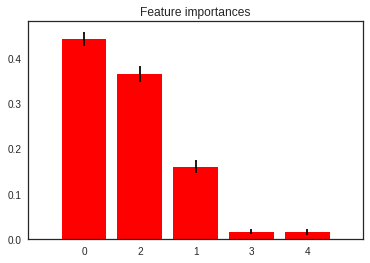

In [25]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print((X.columns[f], indices[f],
           importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


Let's try the random forest with just the important features.

In [26]:
# Defining cross-validation parameters.
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

X2 = df.loc[:, ['purch_amt', 'age', 'days_since_last_purch']]

rfcfit = rfc.fit(X2, y)


print('R² for the RF model: \n', rfcfit.score(X2, y))
print('Accuracy Score: \n', rfcfit.score(X2, y))
score = cross_val_score(rfcfit, X2, y, cv=cv)
print("\nMean (SD) Cross Validation Score: %0.2f (+/- %0.2f)" %
      (score.mean(), score.std() * 2))
print('\nCross Validation Scores: \n', score)


# Extract predicted values.
predicted = rfcfit.predict(X2)
actual = y

cm = pd.crosstab(y, predicted, rownames=['True'], 
             colnames=['Predicted'], margins=True)
print("\nConfusion Matrix:  \n", cm)
print("\n                    Classification Report \n",
      classification_report(y, predicted))

R² for the RF model: 
 0.9991607938127617
Accuracy Score: 
 0.9991607938127617

Mean (SD) Cross Validation Score: 0.83 (+/- 0.01)

Cross Validation Scores: 
 [0.8308778  0.82959043 0.83459686 0.82763553 0.82730177]

Confusion Matrix:  
 Predicted      0      1     All
True                           
0          85979     20   85999
1             68  18794   18862
All        86047  18814  104861

                    Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85999
           1       1.00      1.00      1.00     18862

   micro avg       1.00      1.00      1.00    104861
   macro avg       1.00      1.00      1.00    104861
weighted avg       1.00      1.00      1.00    104861

